In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("E:\INTERNSHIP TEST\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print('No Frauds',df['Class'].value_counts()[0], 'Frauds',df['Class'].value_counts()[1])

No Frauds 284315 Frauds 492


c:\users\simo-\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: DataFrame constructor not properly called!

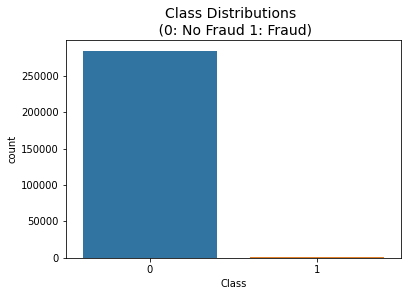

In [5]:
count = sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud 1: Fraud)', fontsize=14)
pd.DataFrame(count, columns=["count"]).to_csv("count.csv", index=False)

#### As we can see from results, the output related to (fraud or non-fraud) is Imbalanced, it's about a rare event that's happened (492/284807 fraud). If we use this dataset, it will cause a bias in the training process and it can influence our machine learning algorithm, the model will probably have 99% accuracy and it will assume every new credit card as a non-fraud.

## Solution

#### What if we think to balance our training dataset, means we will choose randomly 492 non-fraud credit card with the existing 492 fraud credit card, this strategy is called Random undersampling and it involves randomly selecting examples from the majority class ( non-fraud ) to delete from the training dataset. in this case, our machine learning model can distinguish the main characters of fraud credit-cards.

In [6]:
import imblearn
import seaborn as sns

c:\users\simo-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Class', ylabel='Density'>

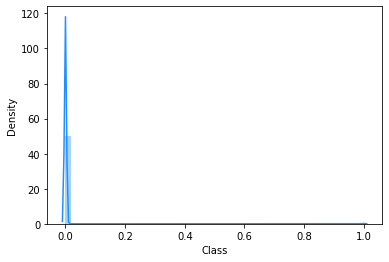

In [7]:
sns.distplot(df['Class'], color="dodgerblue", label="Compact")

#### as we can see our dataset is affected by skewed distribution

In [8]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# defining the dataset
x = df.iloc[:,0:30]
y = df.iloc[:,30:31]

In [9]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [10]:
# instantiating the random undersampler
undersample = RandomUnderSampler(sampling_strategy=1)
X_over, y_over = undersample.fit_resample(x, y)
dt = [X_over, y_over]
dfn = pd.concat(dt, axis=1)
dfn.to_csv("new.csv")

In [12]:
y_over.value_counts()[0], y_over.value_counts()[1]

(Class
 0        492
 dtype: int64,
 Class
 1        492
 dtype: int64)

c:\users\simo-\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

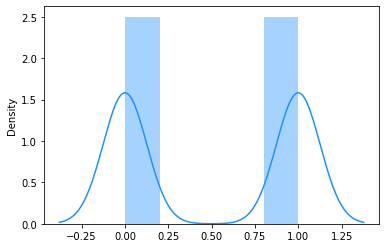

In [13]:
#after balancing the features labels
sns.distplot(y_over, color="dodgerblue", label="Compact")

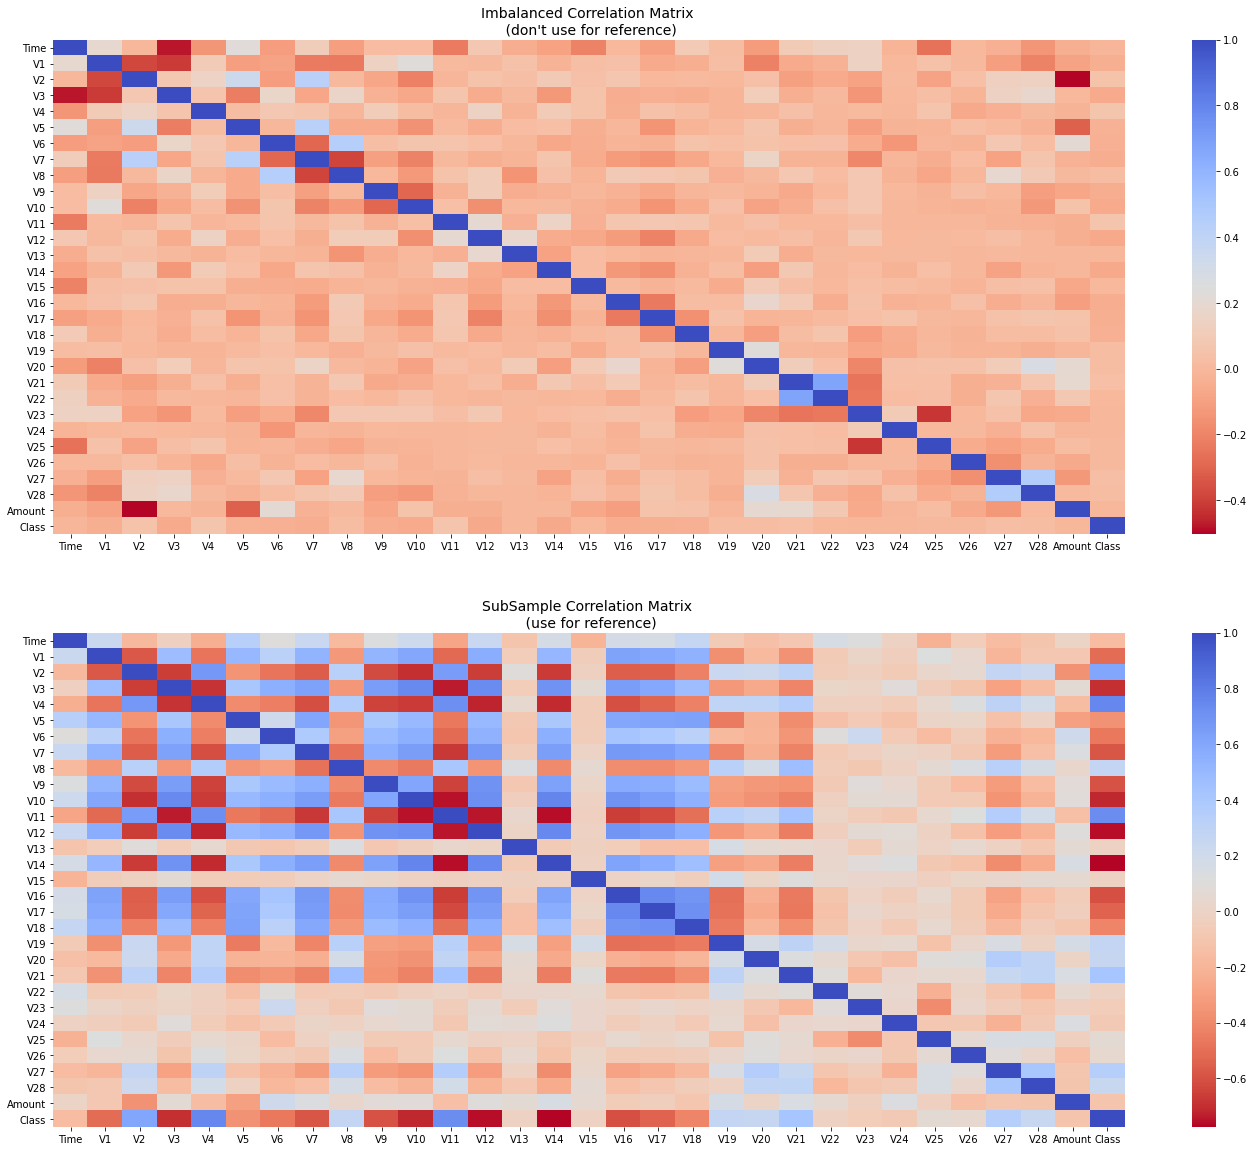

In [14]:
# Make sure we use the subsample in our correlation
from scipy import stats
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr(method='spearman')
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = dfn.corr(method='spearman')
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

##### From the above heatmap graphs we can clearly see that the balance dataset has high correlation than the unbalanced dataset.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

X = dfn.iloc[:,1:30]
Y = dfn['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.127246
         Iterations 20


In [17]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  787
Model:                          Logit   Df Residuals:                      758
Method:                           MLE   Df Model:                           28
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.8163
Time:                        01:01:03   Log-Likelihood:                -100.14
converged:                       True   LL-Null:                       -545.23
Covariance Type:            nonrobust   LLR p-value:                2.243e-169
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -9.0570      1.695     -5.344      0.000     -12.379      -5.735
V2             7.8107      2.727      2.864      0.004       2.466      13.155
V3           -21.6734      4.380     -4.949      0.0

#### The summary shows that our model contains some variables statistically non significant (p-value >0.05), we will procced a froward selection 

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    

    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    

    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    

    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    print("Break : Criteria")
                    break
            else:
                print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    return [model.summary(),"AIC: "+str(model.aic),"BIC: "+str(model.bic),selected_cols]

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return [model.summary(),"AIC: "+str(model.aic),"BIC: "+str(model.bic),cols]


In [24]:
results = forwardSelection(X_train, y_train, model_type ="logistic",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05)

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.692791
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.530607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.508558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385808
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.327101
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.593472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.589528
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.689582
         Iterations 5
Optimization te

Optimization terminated successfully.
         Current function value: 0.259930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.258870
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.255024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200753
         Iterations 9
Entered : V14 	AIC : 323.9851556329383
Optimization terminated successfully.
         Current function value: 0.195995
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.197052
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.197317
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.200739
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.196734
         Iterations 9
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 0.160766
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.159995
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.161185
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.162919
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.161770
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.162848
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.162856
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.159041
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.157768
         Iterations 10
Entered : V13 	AIC : 264.3263743837916
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 0.144015
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.144416
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.144366
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.142773
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.144019
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.144086
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.143098
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.144437
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.141351
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.

In [31]:
final_variables = results[3][1:]
final_variables

['V11', 'V4', 'V14', 'V12', 'V8', 'V10', 'V13', 'V2', 'V17', 'V23', 'V22']

In [29]:
model_summary = results[0]
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  787
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.7960
Time:                        01:03:32   Log-Likelihood:                -111.24
converged:                       True   LL-Null:                       -545.23
Covariance Type:            nonrobust   LLR p-value:                4.760e-179
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.4863      0.310    -11.264      0.000      -4.093      -2.880
V11            0.2244      0.174      1.287      0.198      -0.117       0.566
V4             0.8923      0.141      6.334      0.000       0.616       1.168
V14           -0.9927      0.196     -5.077      0.000      -1.376      -0.609
V12           -0.9594      0.218     -4.396      0.000      -1.387      -0.532
V8            -0.8216      0.174     -4.728      0.000      -1.162      -0.481
V10           -0.9563      0.210     -4.543      0.000      -1.369      -0.544
V13           -0.4404      0.164     -2.678      0.007      -0.763      -0.118
V2            -0.3484      0.106     -3.278      0.001      -0.557      -0.140
V17           -0.6194      0.238     -2.607      0.009      -1.085      -0.154
V23           -0.3921      0.131     -2.986      0.003      -0.649      -0.135
V22            0.5897      0.269      2.190      0.029       0.062       1.118
==============================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### AIC: 235.28820429383262
### BIC: 281.97048677800666
### Final Variables: ['intercept', 'V4', 'V11', 'V14', 'V12', 'V8', 'V28', 'V23', 'Amount', 'V6']

In [32]:
X_ntrain = X_train[final_variables]
X_ntest = X_test[final_variables]
X_ntrain = sm.add_constant(X_ntrain)
X_ntest = sm.add_constant(X_ntest)
log_reg = sm.Logit(y_train, X_ntrain).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.141351
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  787
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 May 2021   Pseudo R-squ.:                  0.7960
Time:                        01:04:52   Log-Likelihood:                -111.24
converged:                       True   LL-Null:                       -545.23
Covariance Type:            nonrobust   LLR p-value:                4.760e-179
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4863      0.310    -11.264      0.000      -4.093      -2.880
V11            0.2244      0

In [33]:
yhat = log_reg.predict(X_ntest)
prediction = list(map(round, yhat))
print('Acutal values', list(y_test.values))
print('Predictions :', prediction)

Acutal values [0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]
Predictions : [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0

In [34]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[ 83   5]
 [  8 101]]
Test accuracy =  0.934010152284264


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        88
           1       0.95      0.93      0.94       109

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



##### the results shows that from 88 non-fraud our model has predicted 83 positive results and only 5 negative result

#### Also the model has predicted only 8 negative results for fraud cases (109 fraud)

### What happen with the originale data-set ?

In [42]:
X = df.iloc[:,1:30]
Y = df['Class']
X_test = df[final_variables]
X_test = sm.add_constant(X_test)
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(Y, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(Y, prediction))

Confusion Matrix : 
 [[275901   8414]
 [    45    447]]
Test accuracy =  0.970299185062165


## as a conclusion, our Logit model work with a good accuracy not only on the undersampled data

###### The goal was to produce quick and easy steps to build a Docker container with a simple machine learning model. Building is as simple as doing a docker build -t my-docker-image .. From this step, we can start the deployment of our models which will be much simpler and removing the fear to publish and scale your machine learning model. The next step is to produce a workflow with a CI/CD tool (Continuous Integration/Continuous Delivery) such as Jenkins. Thanks to this approach, it will be possible to build and serve anywhere a docker container and expose a REST API so that external stakeholders can consume it. If you are training a deep learning model that needs high computational needs, you can move your containers to high performance computing servers or any platform of your choice such as on premises, private or public cloud. The idea is that you can scale your model but also create resilient deployment as you can scale the container across regions/availability zones. I hope you can see the great simplicity and flexibility containers provide. By containerizing your machine/deep learning application, you can make it visible to the world. The next step is to deploy it in the cloud and expose it. At certain points in time, you will need to orchestrate, monitor and scale your containers to serve millions of users with the help of technologies such as Red Hat OpenShift, a Kubernetes distribution. Environement standarization, builde once and deploy everywhere, isolation, portability

#### Let see results using SVM

In [37]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [38]:
pred = svc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,pred))

[[78 10]
 [37 72]]


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77        88
           1       0.88      0.66      0.75       109

    accuracy                           0.76       197
   macro avg       0.78      0.77      0.76       197
weighted avg       0.79      0.76      0.76       197

